In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
def apply_laplacian_filter(image):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
    # Convolve the image with the Laplacian kernel
    sharpened = cv2.filter2D(image, -1, laplacian_kernel)    
    return sharpened

def apply_laplacian_extension_filter(image):
    laplacian_kernel = np.array([
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1]
    ])
    # Convolve the image with the Laplacian kernel
    sharpened = cv2.filter2D(image, -1, laplacian_kernel)
    return sharpened

def apply_sobel_gradient_filter(image):
    # Define Sobel kernels
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    sobel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    
    # Convolve the image with the Sobel kernels
    gradient_x = cv2.filter2D(image, -1, sobel_x)
    gradient_y = cv2.filter2D(image, -1, sobel_y)
    
    # Compute the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)
    sharpened = cv2.subtract(image, gradient_magnitude)
    return sharpened

def apply_robert_gradient_filter_sharpened(image):
    # Define Roberts kernels
    roberts_x = np.array([
        [0, 1],
        [-1, 0]
    ])
    roberts_y = np.array([
        [1, 0],
        [0, -1]
    ])
    
    # Convolve the image with the Roberts kernels
    gradient_x = cv2.filter2D(image, -1, roberts_x)
    gradient_y = cv2.filter2D(image, -1, roberts_y)
    
    # Compute the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(np.uint8)
    sharpened = cv2.subtract(image, gradient_magnitude)
    
    return sharpened

def apply_filter(image, filter_function):
    # Split the image into its RGB channels
    r, g, b = cv2.split(image)
    
    # Apply the filter function to each channel
    r_filtered = filter_function(r)
    g_filtered = filter_function(g)
    b_filtered = filter_function(b)
    
    # Merge the filtered channels
    filtered_image = cv2.merge([r_filtered, g_filtered, b_filtered])
    
    return filtered_image

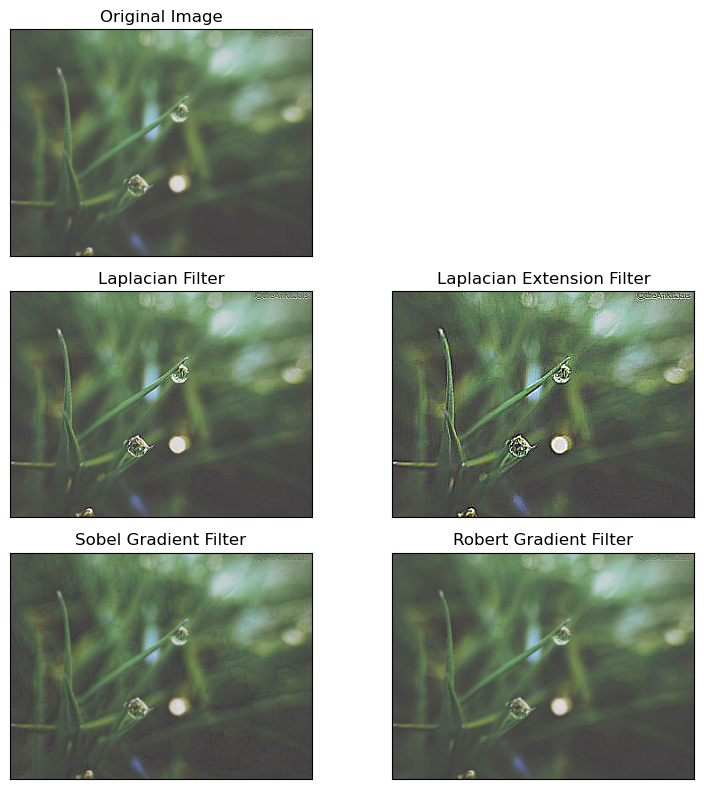

In [33]:
# Load image
blurred_image = cv2.imread("../original_images/blurred_image.jpg")
# Apply the sharpening filters to the color image
laplacian = apply_filter(blurred_image, apply_laplacian_filter)
laplacian_extension = apply_filter(blurred_image, apply_laplacian_extension_filter)
gradient_sobel = apply_filter(blurred_image, apply_sobel_gradient_filter)
gradient_robert = apply_filter(blurred_image, apply_robert_gradient_filter_sharpened)

# Save the output images
cv2.imwrite(f"./OUTPUT/laplacian.png", laplacian)
cv2.imwrite(f"./OUTPUT/laplacianExtension.png", laplacian_extension)
cv2.imwrite(f"./OUTPUT/gradientSobel.png", gradient_sobel)
cv2.imwrite(f"./OUTPUT/gradientRobert.png", gradient_robert)

# Display the results
plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1), plt.imshow(blurred_image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 3), plt.imshow(laplacian)
plt.title('Laplacian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 4), plt.imshow(laplacian_extension)
plt.title('Laplacian Extension Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 5), plt.imshow(gradient_sobel)
plt.title('Sobel Gradient Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 6), plt.imshow(gradient_robert)
plt.title('Robert Gradient Filter'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()